# APIs (Application Programming Interface)

## What you are going to learn in this course 🧐🧐

APIs are a great way to exchange data! In this course, we will learn:

* What is a REST API
* How to request data from an API
* How to send data to an API (and get the according response)

## What is an API? ❓

An API is simply a way to move data to, and from a web application.

For example, you may have been to a website and registered via Facebook. In computer terms, the website you went to uses the Facebook API to get your information and ultimately lets you register.

Another example, when you buy airline tickets, you rarely go to the airline's website. Instead, you go to a travel search engine (like <a href="https://www.kayak.fr/" target="_blank">Kayak</a>) and buy your tickets on it. Well, the search engine site most likely uses the airline API to get information about ticket prices, times and destinations.

## REST API 😴

There are many possible ways to create APIs, simply because an API is just a piece of software hosted on a web server that waits for HTTP requests to send responses containing data. In order to help people create and use APIs more easily and create coherence, conventions were invented regarding APIs.

You will often hear about the RESTful API or REST API. REST stands for _REpresentational State Transfer_. It is simply one of the coding conventions that a lot of developers follow to create APIs. There is no need in this course to see what the standards of a REST API are, but you can find out more about it at <a href="https://en.wikipedia.org/wiki/Representational_state_transfer" target="_blank">this link</a>.


## Interact with APIs with `requests` 

There is a library in Python which you can use to get data from an API: `requests`.

This library lets you set up and send HTTP requests over to any web server, whether they contain websites or APIs. This will be one of the main tools we will use to interact with APIs.

Like all libraries, you will be able to use `requests` by doing:

In [1]:
import requests

### Create a request

Now that the library has been imported, you can access web data by writing a request.

#### `GET` request 👋

As a reminder, a request using the GET method will attempt to retrieve data from the web server according to a certain instruction.

Let's ask <a href="https://developer.github.com/v3/" target="_blank">Github's</a> API for information first. For this, you will need to use the _.get()_ method. 

We will request the following url: `https://api.github.com/zen`, as is recommended in the [getting started guide](https://docs.github.com/en/rest/guides/getting-started-with-the-rest-api).

In [9]:
r = requests.get("https://api.github.com/zen")

# now let's look at what's in this variable
r

<Response [200]>

##### Access response `content`

Here we receive `<Response [200]>` which means that the request was successful. Now let's take a look at the data that was recieved along with this response.

In [12]:
r.content

b"It's not fully shipped until it's fast."

As expected from reading the user guide, the data contained in the response is a quote from github's philosophy, the data is in _bytes_ format, a data format that can be used to represent any type of data (text, images, audio, etc...)

##### Other attributes from responses

The data content is not necessarily the only piece of data or information contained in the response. Let's take a look at a few other things.

In [13]:
r.headers # describes all the metadata associated with the request and the server response

{'Server': 'GitHub.com', 'Date': 'Wed, 27 Mar 2024 10:32:44 GMT', 'Content-Type': 'text/plain;charset=utf-8', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-src 'none'", 'Vary': 'Accept-Encoding, Accept, X-Requested-With', 'Content-Encoding': 'gzip', 'X-RateLimit-Limit': '60', 'X-RateLimit-Remaining': '59', 'X-RateLimit-Reset': '1711539164', 'X-RateLimit-Resou

In [14]:
r.text # will output the data contained in the response and convert it to text format

"It's not fully shipped until it's fast."

#### Add parameters in a request ⚖️

Often you need to add parameters to your query. For example, you might be using an API that requires  an authentication token as parameter. It will suffice to deal with this the following way:

In [15]:
# Creating data that is usually called payload
payload = {'key1': 'value1', 'key2': 'value2'}

# Getting data that includes payload as parameters
r = requests.get('https://httpbin.org/get', params=payload)
r

<Response [200]>

Here we added keys and values in a variable we called _payload_ and added in our `GET` request.

#### POST request 🙋‍♀️

You can also post data using the `.post()` method. This works in the same way as `.get()` but you simply need to add a parameter that includes the data you want to send. For example let's access the API described [here](https://httpbin.org/):

In [16]:
# Here we send data using the data parameter that currently has a dictionary {"hey": "value"} 
r = requests.post('https://httpbin.org/post', data = {'key':'value'})
r

<Response [200]>

<bound method Response.json of <Response [200]>>

##### Response attributes

We have got a successful request, let's access various elements contained in it.

In [17]:
r.content # looks like the data is organised in a strange way, it's not just text

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key": "value"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Content-Length": "9", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.31.0", \n    "X-Amzn-Trace-Id": "Root=1-6603f756-65e15fa77449f9145cc783c2"\n  }, \n  "json": null, \n  "origin": "141.255.129.80", \n  "url": "https://httpbin.org/post"\n}\n'

In [18]:
r.headers # In the header, the 'Content-Type' shows us that the data contained in the response is in JSON format

{'Date': 'Wed, 27 Mar 2024 10:39:19 GMT', 'Content-Type': 'application/json', 'Content-Length': '484', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [19]:
r.json() # in order to insterpret the data as a json file we can use this method

{'args': {},
 'data': '',
 'files': {},
 'form': {'key': 'value'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Content-Length': '9',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.31.0',
  'X-Amzn-Trace-Id': 'Root=1-6603f756-65e15fa77449f9145cc783c2'},
 'json': None,
 'origin': '141.255.129.80',
 'url': 'https://httpbin.org/post'}

The url we accessed from this API included json type data in its response contrary to the first request which gave us text data. In other words, different url from different API may include various data types in their server responses.

#### Send a file 📁

If you want to send a complete file as a POST request, you just need to add the _files_ parameter.

In [20]:
# Let's import pandas to create a dataframe and write it on a file
import pandas as pd

# Creating a dummy dataframe
df = pd.DataFrame({
    "A":[1,2,3,4]
})

# Writing a dummy file
df.to_csv("file.csv")

# Opening the file
f = {'file': open('file.csv', 'rb')}

# Posting the content of this file to https://httpbin.org/post
r = requests.post('https://httpbin.org/post', files=f)
r

<Response [200]>

#### Access the content of a request 📦

Let's go through the different types of response contents one more time!

- **Pure text content**

You can easily access the content of our code via the _.text_ attribute. This is very useful because you will get a response as a string that you can use as you wish afterwards.

In [15]:
r = requests.get('https://api.github.com/zen')
r.text[:200]  # Display first 200 characters

"It's not fully shipped until it's fast."

- **JSON content**

Easier to handle, you can get the content of your query in JSON format.

In [19]:
r = requests.get('https://api.github.com/users/JedhaBootcamp')
r.json()  # Display first JSON/dict

{'login': 'JedhaBootcamp',
 'id': 39502362,
 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjM5NTAyMzYy',
 'avatar_url': 'https://avatars.githubusercontent.com/u/39502362?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/JedhaBootcamp',
 'html_url': 'https://github.com/JedhaBootcamp',
 'followers_url': 'https://api.github.com/users/JedhaBootcamp/followers',
 'following_url': 'https://api.github.com/users/JedhaBootcamp/following{/other_user}',
 'gists_url': 'https://api.github.com/users/JedhaBootcamp/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/JedhaBootcamp/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/JedhaBootcamp/subscriptions',
 'organizations_url': 'https://api.github.com/users/JedhaBootcamp/orgs',
 'repos_url': 'https://api.github.com/users/JedhaBootcamp/repos',
 'events_url': 'https://api.github.com/users/JedhaBootcamp/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/JedhaBootcamp/received_events',
 'type'

Json formats are really common data formats for APIs, they work very much like dictionaries which makes them very flexible in terms of the amount and type of information that they can contain.

- Binary Content

In some cases, you will want your answer to be in binary format. This is indeed very useful when you have made a query to get an image rather than text content. The binary format may be adopted to store any type of file or data, it is the most flexible.

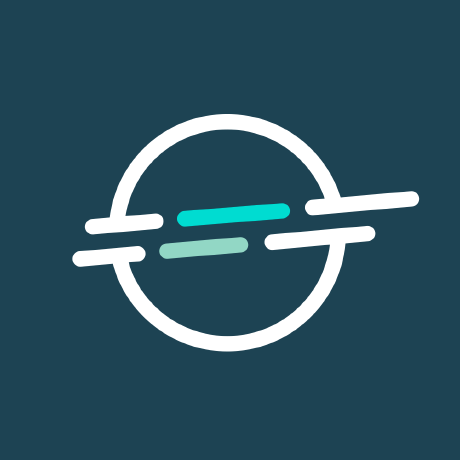

In [21]:
# Request avatar from Github
r = requests.get("https://avatars0.githubusercontent.com/u/39502362?v=4")

# Import PIL and Io to read bytes and translate http file as an image
from PIL import Image
from io import BytesIO

# Use .open() method to read bytes from content
i = Image.open(BytesIO(r.content))
i

## Resources 📚📚

- <a href="https://en.wikipedia.org/wiki/Representational_state_transfer" target="_blank">The wikipedia article for the REST API</a>
- <a href="https://www.computersciencezone.org/50-most-useful-apis-for-developers/" target="_blank">50 useful APIs</a>
- <a href="http://docs.python-requests.org/en/master/user/quickstart/" target="_blank">Requests library documentation</a>
- [Public APIs classified by theme to get data](https://github.com/public-apis/public-apis)